In [1]:
import os 
import pandas as pd

cwd = os.getcwd()
file_list = []
file_stock_list = os.listdir(cwd+"\\data\\stocks\\")
file_future_list = os.listdir(cwd+"\\data\\futures\\")
sTicker_lis =  ['3443','2388', '2498', '2610', '1319', '3035', '3006', '2615', '5425', '3105']
fTicker_lis = ['JBF', 'QWF', 'HCF', 'DBF', 'EHF', 'IPF', 'IIF', 'QXF', 'PEF', 'NAF']

stockDataFileName = []
indexFuturesFileName =[]
x = 1
pair_name = sTicker_lis[x] + "-" + fTicker_lis[x]
for i in range(x,x+1):
    stock_csv = []
    future_csv = []
    for j in range(len(file_stock_list)):
        if sTicker_lis[i] in file_stock_list[j]:
            stock_csv.append(cwd+'\\data\\stocks\\' + file_stock_list[j])
    stockDataFileName.extend(stock_csv)
    
    for j in range(len(file_stock_list)):
        if fTicker_lis[i] in file_future_list[j]:
            future_csv.append(cwd+'\\data\\futures\\' + file_future_list[j])
    indexFuturesFileName.extend(future_csv)
file_list.extend(stockDataFileName)
file_list.extend(indexFuturesFileName)
file_list

['C:\\Users\\14775\\Desktop\\Python\\Quiz8\\data\\stocks\\2388_md_202304_202304.csv.gz',
 'C:\\Users\\14775\\Desktop\\Python\\Quiz8\\data\\stocks\\2388_md_202305_202305.csv.gz',
 'C:\\Users\\14775\\Desktop\\Python\\Quiz8\\data\\stocks\\2388_md_202306_202306.csv.gz',
 'C:\\Users\\14775\\Desktop\\Python\\Quiz8\\data\\futures\\QWF1_md_202304_202304.csv.gz',
 'C:\\Users\\14775\\Desktop\\Python\\Quiz8\\data\\futures\\QWF1_md_202305_202305.csv.gz',
 'C:\\Users\\14775\\Desktop\\Python\\Quiz8\\data\\futures\\QWF1_md_202306_202306.csv.gz']

In [2]:
import pandas as pd

data_stock_dir_04 = file_list[0]
data_stock_dir_05 = file_list[1]
data_stock_dir_06 = file_list[2]
df_stock_04 = pd.read_csv(data_stock_dir_04, compression='gzip', index_col=0, header=0, sep=',', quotechar='"')
df_stock_05 = pd.read_csv(data_stock_dir_05, compression='gzip', index_col=0, header=0, sep=',', quotechar='"') 
df_stock_06 = pd.read_csv(data_stock_dir_06, compression='gzip', index_col=0, header=0, sep=',', quotechar='"') 

data_future_dir_04 = file_list[3]
data_future_dir_05 = file_list[4]
data_future_dir_06 = file_list[5]
df_future_04 = pd.read_csv(data_future_dir_04, compression='gzip',  header=0, sep=',', quotechar='"')
df_future_05 = pd.read_csv(data_future_dir_05, compression='gzip',  header=0, sep=',', quotechar='"') 
df_future_06 = pd.read_csv(data_future_dir_06, compression='gzip',  header=0, sep=',', quotechar='"') 

df_stock = pd.concat([df_stock_04, df_stock_05])
df_stock = pd.concat([df_stock, df_stock_06])

df_future = pd.concat([df_future_04, df_future_05])
df_future = pd.concat([df_future, df_future_06])

futuresData = df_future[df_future["date"] != "2023-06-30"]
stockData = df_stock[df_stock["date"] != "2023-06-30"]

In [3]:
#处理NAN

import numpy as np
stockData_bkp = stockData.copy(deep=True)
stockData['lastPx']=stockData.groupby('date')['lastPx'].fillna(method='ffill')
stockData['size']=stockData.groupby('date')['size'].fillna(0)
futuresData['midQ'] = (futuresData['bidPrice1'] + futuresData['askPrice1'])/2

C:\Users\14775\AppData\Local\Temp\ipykernel_10236\2398368173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockData['lastPx']=stockData.groupby('date')['lastPx'].fillna(method='ffill')
C:\Users\14775\AppData\Local\Temp\ipykernel_10236\2398368173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockData['size']=stockData.groupby('date')['size'].fillna(0)
C:\Users\14775\AppData\Local\Temp\ipykernel_10236\2398368173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [4]:
#synchronize the two time series

#First, we want to get the common trading days from the two time series

##We first get the trading days from the stock data
stockData_dates = np.unique(stockData.date)
stoD=pd.to_datetime(stockData_dates, format="%Y-%m-%d")
qqqq=stoD.year*10000+stoD.month*100+stoD.day

##Next, we get the trading days from the futures data
indexData_dates = np.unique(futuresData.date)
indD=pd.to_datetime(indexData_dates, format="%Y-%m-%d")
pppp=indD.year*10000+indD.month*100+indD.day

##Now, we can get the common days of the two time series
commonDays=pd.to_datetime(pppp.intersection(qqqq),format="%Y%m%d")

##With common days generated for both stock and futures, we synchronize days first
d_futures=pd.to_datetime(futuresData.date,format="%Y-%m-%d")
futuresData.date=d_futures
futuresData=futuresData[futuresData.date.isin(commonDays)]

d_stock=pd.to_datetime(stockData.date,format="%Y-%m-%d")
stockData.date=d_stock
stockData=stockData[stockData.date.isin(commonDays)]

##In order to synchronize trade time, too, we create indexes for both dataframes that have the same format
stockData_DateTime = pd.to_datetime(stockData.date.astype(str) + ' ' + stockData.time.astype(str), format="%Y-%m-%d %H%M%S%f")
futuresData_DateTime = pd.to_datetime(futuresData.date.astype(str) + ' ' + futuresData.time.astype(str), format="%Y-%m-%d %H%M%S%f")

##Now, we create indexes of the same format for both the stock data and the index futures data
stockData.index = stockData_DateTime
stockData = stockData[~stockData.index.duplicated(keep='last')]

futuresData.index = futuresData_DateTime
futuresData = futuresData[~futuresData.index.duplicated(keep='last')]

##Now, we synchronize the timestamps of the two time series; here, we downsample the time series with more time stamps
###First, we union the indexes
new_index1=stockData.index.union(futuresData.index)
new_index=np.unique(new_index1)

###Next, we insert stock time stamps to index futures data
resampledFuturesData = futuresData.reindex(new_index)

###Then, we forward fill nan's in the index futures data so that date and time will not be nan's
resampledFuturesData.fillna(method='ffill',inplace=True)

###down sample index data to synchronize with stock data
futuresData_downsampled=resampledFuturesData.loc[stockData.index]


C:\Users\14775\AppData\Local\Temp\ipykernel_10236\1178493328.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  futuresData.date=d_futures
C:\Users\14775\AppData\Local\Temp\ipykernel_10236\1178493328.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockData.date=d_stock


In [5]:
#define the columns of the dataframe that holds both features and labels
basicCols = ['date', 'time', 'sAskPrice1','sBidPrice1','sMidQ', 'fAskPrice1','fBidPrice1', 'fMidQ']

# 自变量
featureCols = []

# 因变量
labelCols = []

# feature 个数
window = range(10, 110, 10)

for i in window:
    basicCols.extend(['fLaggingRtn_{}'.format(str(i))])
    featureCols.extend(['fLaggingRtn_{}'.format(str(i))])
for i in window:
    basicCols.extend(['sForwardRtn_{}'.format(str(i))])
    labelCols.extend(['sForwardRtn_{}'.format(str(i))])

In [6]:
#define the pandas dataframe
df = pd.DataFrame(columns=basicCols)

#Populate df with basic data
df['date']=stockData['date']
df['time']=stockData['time']
df['sAskPrice1']=stockData['SP1']
df['sBidPrice1']=stockData['BP1']
df['sMidQ']=(stockData['SP1'] + stockData['BP1'])/2
df['fAskPrice1']=futuresData_downsampled['askPrice1']
df['fBidPrice1']=futuresData_downsampled['bidPrice1']
df['fMidQ']=futuresData_downsampled['midQ']

In [7]:
# group_1: leading lagging
# we calculate forward return of stocks and lagging returns of futures
for i in window:
    
    # 后面第10天，20天，30天... 的stock return
    df['sForwardRtn_{}'.format(str(i))]=df.groupby('date')['sMidQ'].shift(-i) / df['sMidQ'].shift(0) - 1
    
    # 前面第10天，20天，30天... 的future return
    df['fLaggingRtn_{}'.format(str(i))]=df['fMidQ'].shift(0) / df.groupby('date')['fMidQ'].shift(i) - 1
    
    #fillna
    df['sForwardRtn_{}'.format(str(i))].fillna(0, inplace=True)
    df['fLaggingRtn_{}'.format(str(i))].fillna(0, inplace=True)
    
    #replace inf
    df['sForwardRtn_{}'.format(str(i))].replace([np.inf, -np.inf], 0, inplace=True)
    df['fLaggingRtn_{}'.format(str(i))].replace([np.inf, -np.inf], 0, inplace=True)

In [8]:
#Now, we iterate through all days and conduct leading/lagging effect analysis for each day

##But first, we need to get all days
allDays = stockData.date
date_index=np.unique(allDays)
count=0
for i in date_index:
    count = count + 1
date_index[1:30]

array(['2023-04-07T00:00:00.000000000', '2023-04-10T00:00:00.000000000',
       '2023-04-11T00:00:00.000000000', '2023-04-12T00:00:00.000000000',
       '2023-04-13T00:00:00.000000000', '2023-04-14T00:00:00.000000000',
       '2023-04-17T00:00:00.000000000', '2023-04-18T00:00:00.000000000',
       '2023-04-19T00:00:00.000000000', '2023-04-20T00:00:00.000000000',
       '2023-04-21T00:00:00.000000000', '2023-04-24T00:00:00.000000000',
       '2023-04-25T00:00:00.000000000', '2023-04-26T00:00:00.000000000',
       '2023-04-27T00:00:00.000000000', '2023-04-28T00:00:00.000000000',
       '2023-05-02T00:00:00.000000000', '2023-05-03T00:00:00.000000000',
       '2023-05-04T00:00:00.000000000', '2023-05-05T00:00:00.000000000',
       '2023-05-08T00:00:00.000000000', '2023-05-09T00:00:00.000000000',
       '2023-05-10T00:00:00.000000000', '2023-05-11T00:00:00.000000000',
       '2023-05-12T00:00:00.000000000', '2023-05-15T00:00:00.000000000',
       '2023-05-16T00:00:00.000000000', '2023-05-17

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings("ignore")

#Next, we create a bunch of linear regression models to study index futures leading/lagging effects
linearR_Models = {}
for i in window:
    linearR_Models['model_{}'.format(str(i))] = linear_model.LinearRegression(fit_intercept=True)

#Furthermore, we create a dataframe to hold the regression R2
r2Cols = ['date']
r2Cols.extend(labelCols)
r2InSample = pd.DataFrame(columns=r2Cols)

# testing error
OOr2Cols = ['date']
OOr2Cols.extend(labelCols)
OOr2InSample = pd.DataFrame(columns=r2Cols)

##Now we iterate through days
for x in range(len(date_index)-20):
    
    # 20天的训练数据
    df_forThisDay_training = df[df.date == date_index[x]]
    for i in range(1,20):
        df_forThisDay_training = pd.concat([df_forThisDay_training, df[df.date == date_index[i+x]]])
           
    # 1天测试数据
    df_forThisDay_testing = df[df.date == date_index[x+20]]

    ###feature data：future的未来j个tick的收益
    features = pd.DataFrame(columns=featureCols)
    for j in window:
        features['fLaggingRtn_{}'.format(str(j))] = df_forThisDay_training['fLaggingRtn_{}'.format(str(j))]

    features_testing = pd.DataFrame(columns=featureCols)
    for j in window:
        features_testing['fLaggingRtn_{}'.format(str(j))] = df_forThisDay_testing['fLaggingRtn_{}'.format(str(j))]

    ###labels data:  stock的未来k个tick的收益
    labels = pd.DataFrame(columns=['label'])
    labels_testing = pd.DataFrame(columns=['label'])

    ###prepare R2Insample stats for output purpose, eg: ['2023-04-06']
    oneLineData = [np.datetime_as_string(date_index[x+20]).split('T')[0]]
    oneLineData_testing = [np.datetime_as_string(date_index[x+20]).split('T')[0]]

    #print(oneLineData)

    ###iterate through all labels and do linear regression
    for k in window:

        ####Get data for this specific label, stock的未来k个tick的收益 k=(10,20,30,...,100)
        labels['label'] = df_forThisDay_training['sForwardRtn_{}'.format(str(k))]
        labels_testing['label'] = df_forThisDay_testing['sForwardRtn_{}'.format(str(k))]

        ####using the specific model to fit the data, 用future的未来收益去 拟合 stock的未来k个tick的收益
        selector = SelectKBest(score_func=f_regression, k=5)
        
        X_train_selected = selector.fit_transform(features, labels)

        X_test_selected = selector.transform(features_testing)

        linearR_Models['model_{}'.format(str(k))].fit(X_train_selected, labels)

        ####CV-results
        #inSampleR2 = cross_val_score(linearR_Models['model_{}'.format(str(k))], X_train_selected, labels, cv=10)
        inSampleR2 = linearR_Models['model_{}'.format(str(k))].score(X_train_selected, labels)
        #inSampleR2 = inSampleR2.mean()

        #### testing error
        pred = linearR_Models['model_{}'.format(str(k))].predict(X_test_selected)
        ooSampleR2 = r2_score(labels_testing['label'], pred)
        #print(ooSampleR2)

        ####record the insample r2
        oneLineData.extend([inSampleR2])
        oneLineData_testing.extend([ooSampleR2])
        #print(ooSampleR2)
        ####some monitoring tool
        print(str(date_index[x+20]) + ', model_{}'.format(str(k)) + "," + str(ooSampleR2))

    ###Finally, append this day's data to the overall data frame, 模型拟合表现    
    r2InSample = pd.concat([r2InSample, pd.DataFrame(data = [oneLineData], columns=r2Cols)])
    ###回测表现
    OOr2InSample = pd.concat([OOr2InSample, pd.DataFrame(data = [oneLineData_testing], columns=r2Cols)])
r2InSample.set_index(r2InSample.date, inplace=True)
OOr2InSample.set_index(r2InSample.date, inplace=True)
del r2InSample['date']
del OOr2InSample['date']
warnings.resetwarnings()

2023-05-05T00:00:00.000000000, model_10,-0.03290676371922596
2023-05-05T00:00:00.000000000, model_20,-0.04971050083996831
2023-05-05T00:00:00.000000000, model_30,-0.05633608544005719
2023-05-05T00:00:00.000000000, model_40,-0.04646440672643237
2023-05-05T00:00:00.000000000, model_50,-0.039542407066563534
2023-05-05T00:00:00.000000000, model_60,-0.038455919519285064
2023-05-05T00:00:00.000000000, model_70,-0.029074506785164544
2023-05-05T00:00:00.000000000, model_80,-0.02665541797041926
2023-05-05T00:00:00.000000000, model_90,-0.026774427291202496
2023-05-05T00:00:00.000000000, model_100,-0.030249311154664227
2023-05-08T00:00:00.000000000, model_10,0.0011051291813374275
2023-05-08T00:00:00.000000000, model_20,0.0009611877076356468
2023-05-08T00:00:00.000000000, model_30,0.0006347445800181095
2023-05-08T00:00:00.000000000, model_40,-0.000602025326177813
2023-05-08T00:00:00.000000000, model_50,-0.001773548068755737
2023-05-08T00:00:00.000000000, model_60,-0.002922898116574979
2023-05-08T0

2023-05-24T00:00:00.000000000, model_40,0.0020259942026689126
2023-05-24T00:00:00.000000000, model_50,0.0020890400591646596
2023-05-24T00:00:00.000000000, model_60,0.0019973341557779634
2023-05-24T00:00:00.000000000, model_70,0.0020075928981921898
2023-05-24T00:00:00.000000000, model_80,0.00198456503072042
2023-05-24T00:00:00.000000000, model_90,0.001850262216933407
2023-05-24T00:00:00.000000000, model_100,0.0016331529632565012
2023-05-25T00:00:00.000000000, model_10,0.0029089065516109125
2023-05-25T00:00:00.000000000, model_20,0.00468850397452103
2023-05-25T00:00:00.000000000, model_30,0.00631176773564146
2023-05-25T00:00:00.000000000, model_40,0.006519596163059971
2023-05-25T00:00:00.000000000, model_50,0.00663586013255546
2023-05-25T00:00:00.000000000, model_60,0.006820610962417928
2023-05-25T00:00:00.000000000, model_70,0.006672562654298497
2023-05-25T00:00:00.000000000, model_80,0.006479415704969349
2023-05-25T00:00:00.000000000, model_90,0.006223619416676485
2023-05-25T00:00:00.0

2023-06-14T00:00:00.000000000, model_70,-0.0005103984523622263
2023-06-14T00:00:00.000000000, model_80,-0.0006174465468498092
2023-06-14T00:00:00.000000000, model_90,-0.0007251131780845466
2023-06-14T00:00:00.000000000, model_100,-0.0007469502167321007
2023-06-15T00:00:00.000000000, model_10,-0.00018716152667397346
2023-06-15T00:00:00.000000000, model_20,-0.0015762886868160297
2023-06-15T00:00:00.000000000, model_30,-0.0032107848179836473
2023-06-15T00:00:00.000000000, model_40,-0.004864876642684646
2023-06-15T00:00:00.000000000, model_50,-0.006521240316280208
2023-06-15T00:00:00.000000000, model_60,-0.008296734066352895
2023-06-15T00:00:00.000000000, model_70,-0.010150760493651934
2023-06-15T00:00:00.000000000, model_80,-0.012013952480299128
2023-06-15T00:00:00.000000000, model_90,-0.013775703981048437
2023-06-15T00:00:00.000000000, model_100,-0.01570303283068286
2023-06-16T00:00:00.000000000, model_10,-0.0021841997098150934
2023-06-16T00:00:00.000000000, model_20,-0.00813731852929677

In [48]:
'model_{}'.format(OOr2InSample.max().idxmax().split("_")[-1])

'model_60'

In [53]:
max_value = OOr2InSample.max().max()  # Find the maximum value in the DataFrame
max_row = OOr2InSample[OOr2InSample == max_value].stack().index[0][0]  # Find the row index of the maximum value
max_column = OOr2InSample[OOr2InSample == max_value].stack().index[0][1] 

print("Max Value:", max_value)
print("Max Row:", max_row)
print("Max Column:", max_column)

Max Value: 0.006820610962417928
Max Row: 2023-05-25
Max Column: sForwardRtn_60


In [50]:
OOr2InSample.max().idxmax()

'sForwardRtn_60'

In [47]:
linearR_Models

{'model_10': LinearRegression(),
 'model_20': LinearRegression(),
 'model_30': LinearRegression(),
 'model_40': LinearRegression(),
 'model_50': LinearRegression(),
 'model_60': LinearRegression(),
 'model_70': LinearRegression(),
 'model_80': LinearRegression(),
 'model_90': LinearRegression(),
 'model_100': LinearRegression()}

In [63]:
os.mkdir(cwd+"\\result\\"+pair_name)

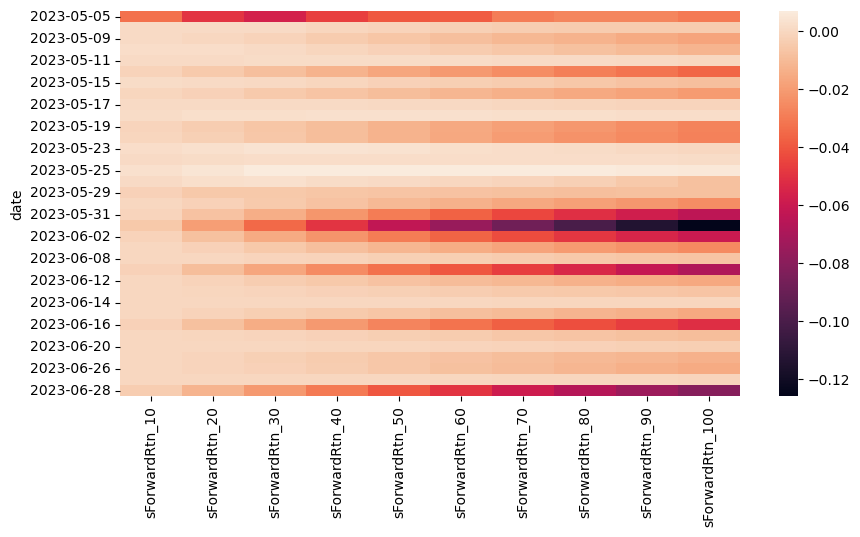

In [57]:
###Now, let's plot a heatmap for it
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(OOr2InSample)
plt.savefig(cwd+"\\result\\"+pair_name+"\\"+pair_name+"_O_heatmap.png")

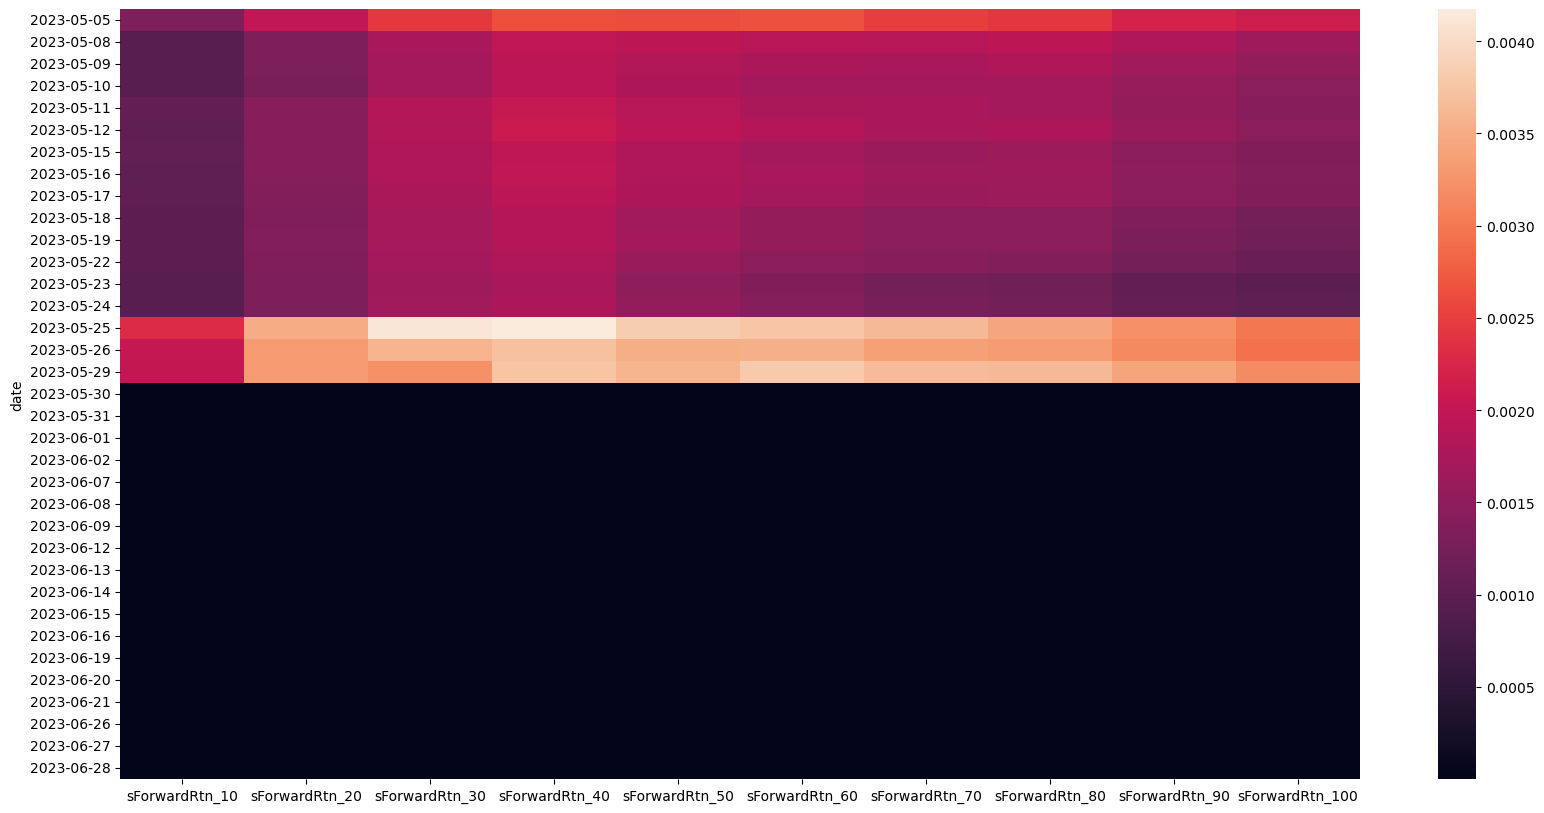

In [66]:
###Now, let's plot a heatmap for it
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(r2InSample)
plt.savefig(cwd+"\\result\\"+pair_name+"\\"+pair_name+"_I_heatmap.png", dpi=600)

In [61]:
r2InSample.to_csv(cwd+"\\result\\"+pair_name+"\\"+pair_name+'_I_Sample.csv')
OOr2InSample.to_csv(cwd+"\\result\\"+pair_name+"\\"+pair_name+'_O_Sample.csv')

In [43]:
selected_indices = selector.get_support(indices=True)
column_names = features.columns.tolist()
feature_name_list = ""
for i in selected_indices:
    print(i)
    feature_name_list = feature_name_list+ column_names[i] + " "

3
6
7
8
9


In [44]:
feature_name_list

'fLaggingRtn_40 fLaggingRtn_70 fLaggingRtn_80 fLaggingRtn_90 fLaggingRtn_100 '